## SDR Capture Analysis

This notebook loads the I/Q data captured from an SDR and performs a basic frequency analysis.

Loaded 2,400,000 samples.
Generating plot...


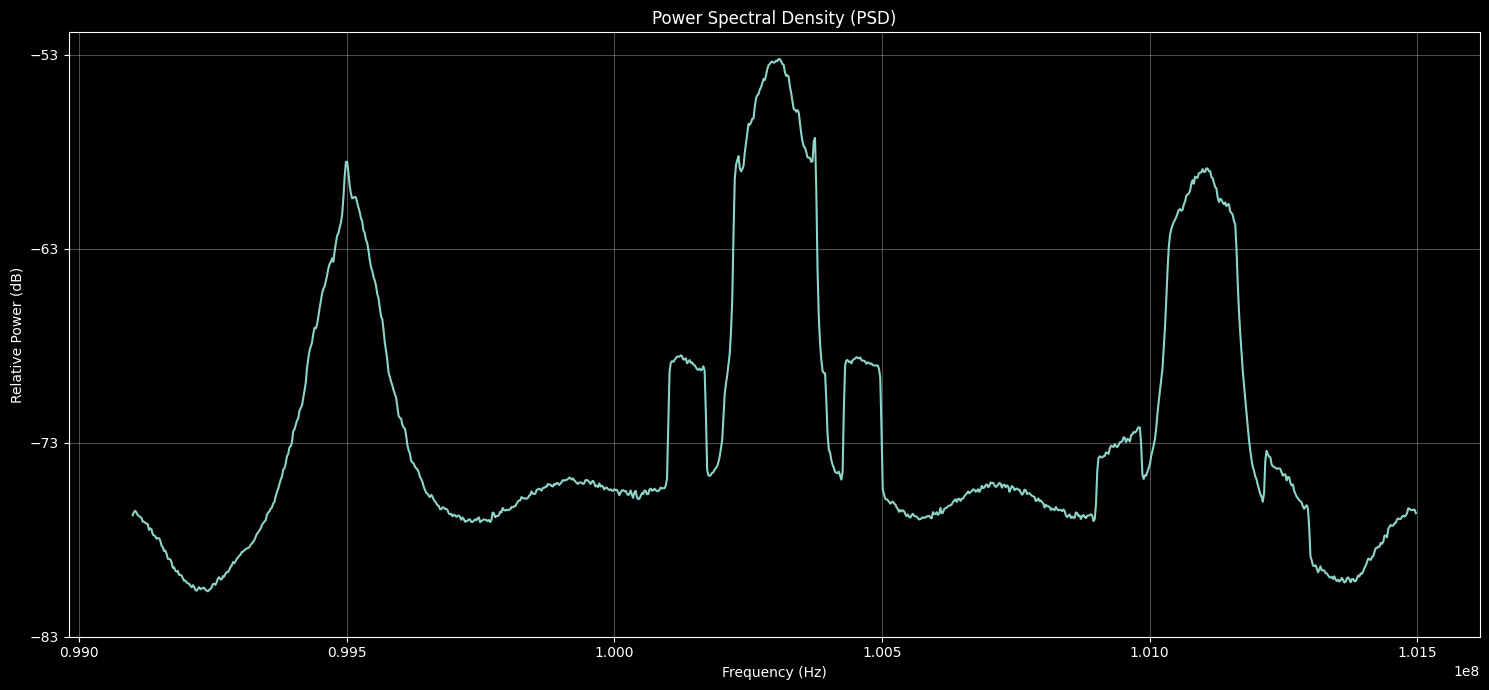

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Parameters ---
# !!! IMPORTANT !!!
# !!! Replace this with the full path to your capture file !!!
capture_file_path = "D:\dataset\metal_sdr\dataset\captures\capture_20251118_195726_100Mhz.sigmf-data"

sample_rate = 2.4e6  # 2.4 Msps, from your script output
center_freq = 100.3e6 # 100.3 MHz, from your script output

# --- Load Data ---
# The capture script saves the data as complex numbers (complex64).
file = Path(capture_file_path)
if not file.exists():
    print(f"ERROR: File not found at '{capture_file_path}'")
    print("Please update the 'capture_file_path' variable with the correct location.")
else:
    iq_samples = np.fromfile(file, dtype=np.complex64)
    print(f"Loaded {len(iq_samples):,} samples.")

    # --- Plotting ---
    print("Generating plot...")
    
    # Set plot style
    plt.style.use('dark_background')
    
    fig, ax = plt.subplots(figsize=(15, 7))

    # Use psd to compute and plot the power spectral density
    ax.psd(iq_samples, NFFT=1024, Fs=sample_rate, Fc=center_freq)
    
    ax.set_title('Power Spectral Density (PSD)')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Relative Power (dB)')
    
    # Improve readability
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### Understanding the Plot

The plot above shows the Power Spectral Density (PSD) of the captured signal. Here's how to read it:

- **X-axis (Frequency):** This shows the range of frequencies present in your capture, centered around the 100.3 MHz you tuned to.
- **Y-axis (Relative Power):** This shows the strength of the signal at each frequency, measured in decibels (dB). 

Peaks in the plot represent signals that were detected by the SDR. You should see a large spike at 0 Hz (the DC offset common to SDRs) and potentially other spikes that correspond to radio stations or other transmitters.